# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 12

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



In [ ]:
import numpy as np
import scipy.stats as sps
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

---
## Задача 1

Напишите  нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. 

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$ (например из лекции).

In [41]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.sin(X).ravel()

assert y.shape == (sample_size,)

Обучите нейронную сеть на этих данных, а также простую линейную регрессию и случайный лес. 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred_regr = regr.predict(X_test)

In [44]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

In [45]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=20), 
    nn.Sigmoid(),  
    nn.Linear(in_features=20, out_features=1) 
)
for parm in model.parameters():
    parm.data = torch.FloatTensor([[1]])
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()
X_train_new = torch.tensor(X_train.reshape(-1, 1), dtype=torch.float32)
y_train_new = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test_new = torch.tensor(X_test.reshape(-1, 1), dtype=torch.float32)
y_test_new = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)
num_iter = 10000

for i in range(num_iter):

    # Forward pass: предсказание модели по данным x_new
    y_pred = model(X_train_new)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_train_new)

    # Bakcward pass: вычисление градиентов оптимизируемой функции 
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего 
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    y_neural = model(X_test_new)

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

In [46]:
def pred(X, y, y_pred):
  MSE = mean_squared_error(y, y_pred)
  plt.figure(figsize=(15, 8))
  plt.scatter(X, y_pred, c='purple', linewidth=5)
  plt.scatter(X, y, alpha=0.8)
  print(f'MSE= {MSE}')



MSE= 0.06407676970574921
MSE= 1.1226659001864529e-09
MSE= 0.009043917706297807


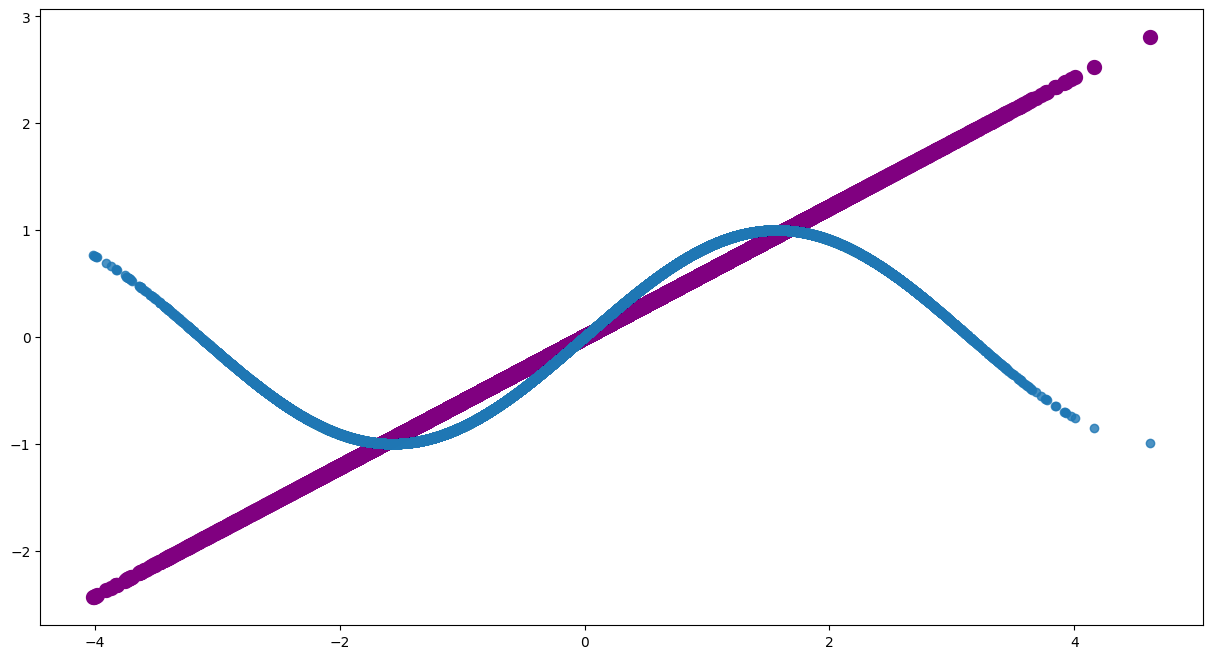

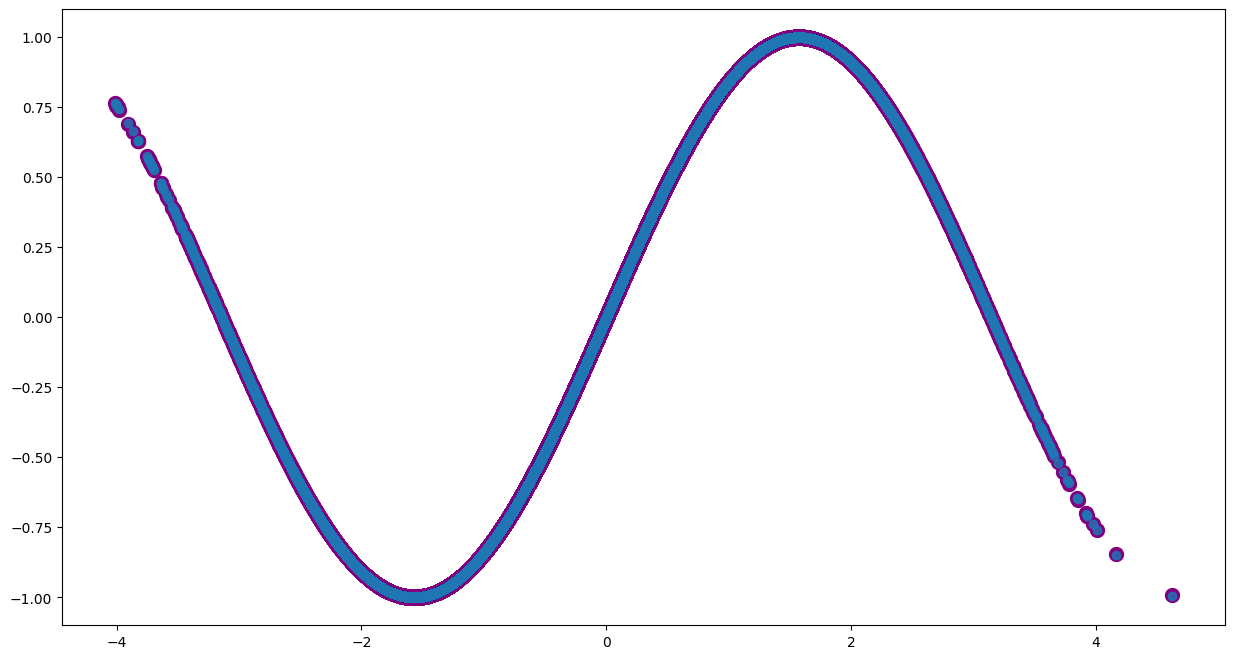

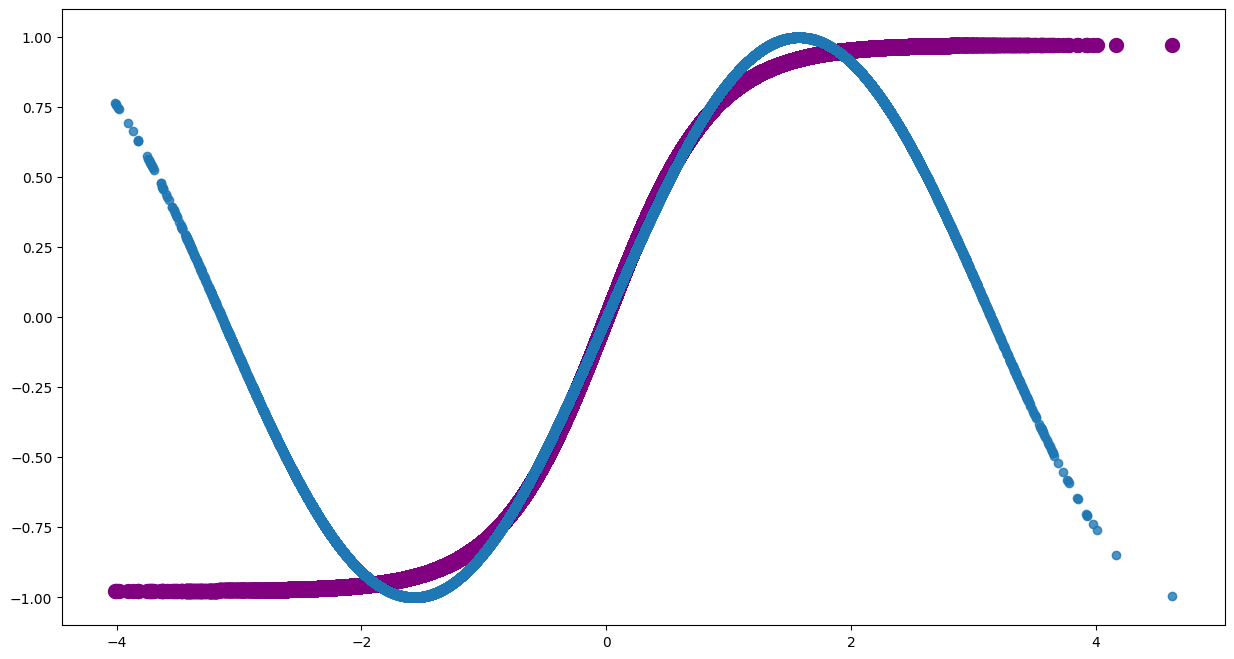

In [47]:
pred(X_test, y_test, y_pred_regr)
pred(X_test, y_test, y_pred_forest)
pred(X_test, y_test, y_neural.detach().numpy())

Повторите вычисления для нелинейной функции, зависящей от двух параметров $f(x, y)$.

In [30]:
sample_size = int(1e4)
X = sps.norm.rvs(size=(2, sample_size))
y = np.sin(X[0]) * X[1]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.2)

In [35]:
regr_2 = LinearRegression()
regr_2.fit(X_train, y_train)
y_pred_regr_2 = regr_2.predict(X_test)


In [36]:
forest_2 = RandomForestRegressor()
forest_2.fit(X_train, y_train)
y_pred_forest_2 = forest_2.predict(X_test)

In [38]:
model_2 = nn.Sequential(
    nn.Linear(in_features=2, out_features=7), 
    nn.Sigmoid(),  
    nn.Linear(in_features=7, out_features=1) 
)
for p in model.parameters():
    p.data = torch.FloatTensor([[1]])
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()
X_train_new = torch.tensor(X_train, dtype=torch.float32)
y_train_new = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test_new = torch.tensor(X_test, dtype=torch.float32)
y_test_new = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

num_iter = 10000

for i in range(num_iter):

    # Forward pass: предсказание модели по данным x_new
    y_pred = model_2(X_train_new)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_train_new)

    # Bakcward pass: вычисление градиентов оптимизируемой функции 
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего 
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()
    
    y_neural_2 = model_2(X_test_new)
    

In [40]:
print(f'Regression MSE: {mean_squared_error(y_test, y_pred_regr_2)}')
print(f'Random forest MSE: {mean_squared_error(y_test, y_pred_forest_2)}')
print(f'Neural network MSE: {mean_squared_error(y_test, y_neural_2.detach().numpy())}')

Regression MSE: 0.4247668755029451
Random forest MSE: 0.0038198438491582804
Neural network MSE: 0.6030378580004144


**Вывод:**
С нелинейной функцией случайный лес лучше справляется, чем  простая двуслойная нейронная сеть и линейная регрессия. Двуслойная нейронная сеть показала худший результат среди этих трех. По теореме Цыбенко, если строить более гирокие нейронные сети, то функцию можно приблизить с заданной точностью

---
## Задача 2

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$

**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...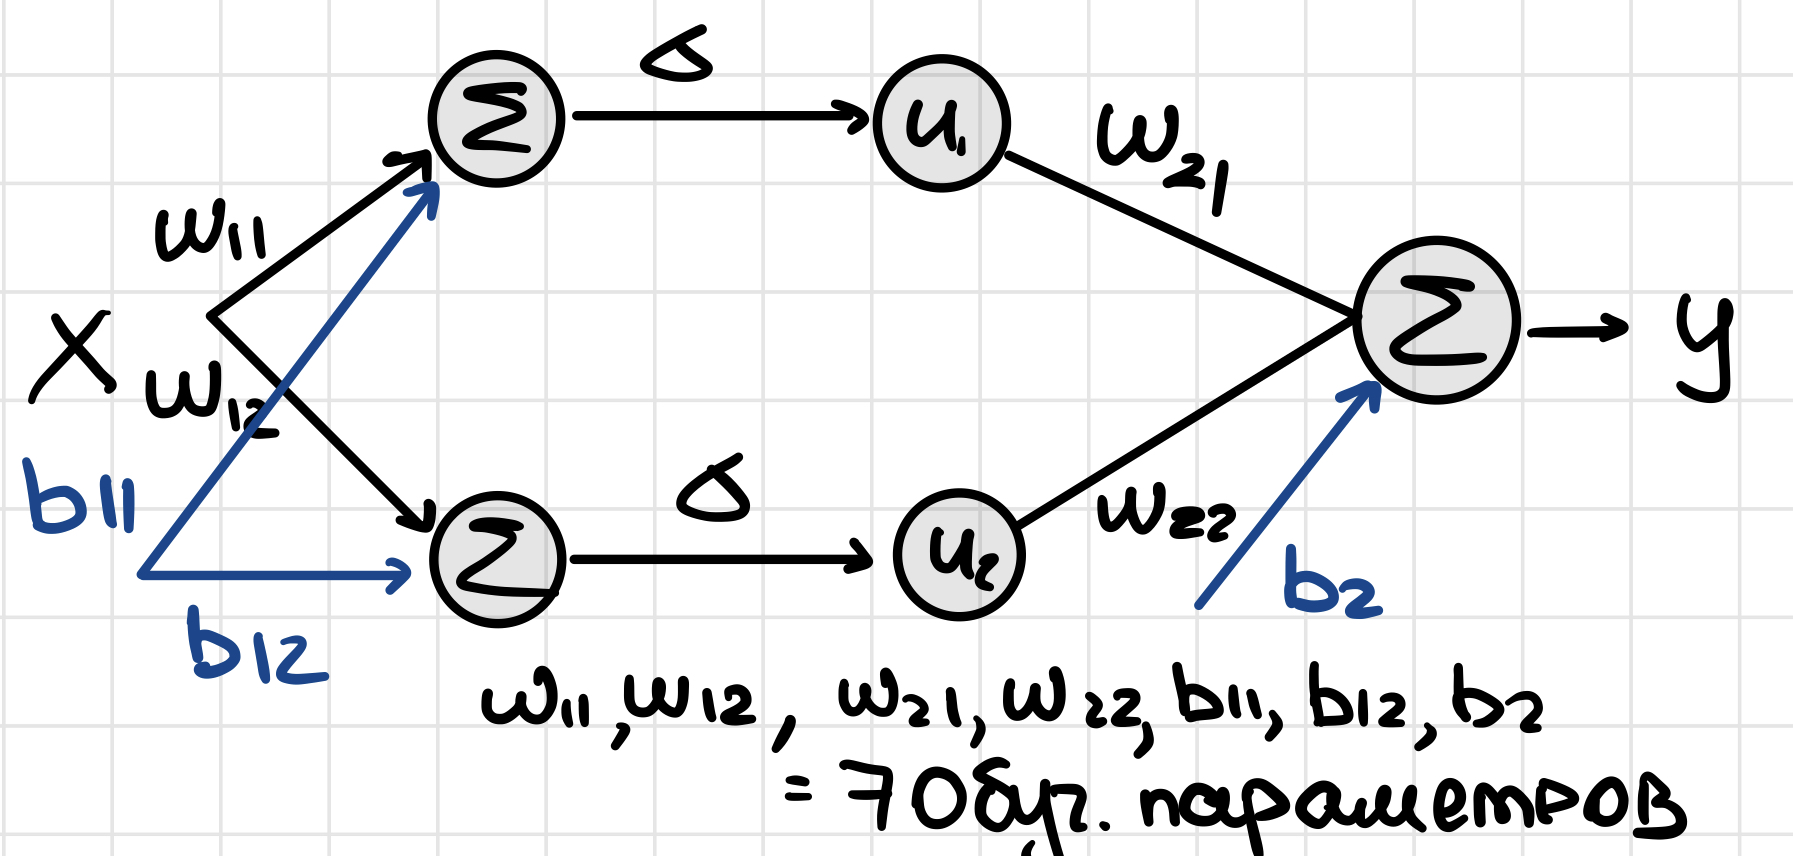

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; -\frac{2}{n}\sum_{i=1}^{n} (Y_i-\hat{y}_i(X_i))$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; u_h(X_i)$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; 1$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; w_{2h}$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$



$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} =  \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h}$$

**2.3.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \sigma(1-\sigma)$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; X_i\sigma(w_{1h}X_i+b_{1h})(1-\sigma(w_{1h}X_i+b_{1h}))$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; \sigma(w_{1h}X_i+b_{1h})(1-\sigma(w_{1h}X_i+b_{1h}))$$


Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} =  \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h} \frac{\partial u_h}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h} \frac{\partial u_h}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

 Можно применить стохастический градиентный спуск.  Вместо вычисления градиента на всей выборке, мы будем обновлять параметры на каждом шаге градиентного спуска, используя только небольшую случайную подвыборку  обучающих объектов

**Вывод:**
Backpropagation - это процесс, который позволяет эффективно вычислять градиенты функции ошибки по параметрам модели в сложных системах. Он основан на принципе вычисления производных поэтапно, начиная с конца вычислительной цепочки.